> #### Prerequisite Exam : ES 335 Fall 2024
> 
>> Name: **Balkrishna Sehra**
>
>> Roll No.: **24210022** 
>
>> Email: [24210022@iitgn.ac.in](24210022@iitgn.ac.in)
>
>> Github: [Renon133](https://github.com/Renon133/es-335-fall-2024/)
>
---

> 1. ***How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.***

For a matrix multiplication between A(n,k) and matrix B(k, m), there will be ***n\*m\*k*** multiplications and ***n\*m\*(k-1)*** additions.

Explanation:
    Since order of A is n, k and order of B is k, m. The order of new matrix will be **(n, m)** since the no. of columns in A is equal to no. of rows in matrix B. Now, for each element in row 1 of A i.e. there will be ***k*** multiplications i.e. (A<sub>11</sub>* B<sub>11</sub> + ... + A<sub>1k</sub> * B<sub>k1</sub>) and ***(k-1)*** additions and there will be **m\*k** multiplications and **m\*(k-1)** additions for the whole first row as there are **m** columns in B matrix. Now, for the **n** rows in A matrix there will be ***n\*m\*k*** multiplications and ***n\*m\*(k-1)*** addtiions for resulting matrix of order **(n,m)**. 

>2. ***Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?***

In [23]:
import numpy as np

mat1 = [[1,2,3],[4,5,6],[7,8,9]]
mat2  = [[3,5,7], [-1, 0, 1], [1, 1, 1]]
A = np.array(mat1)
B = np.array(mat2)

%timeit C = A.dot(B)

def matmul(A, B):
    n, k1 = len(A), len(A[0])
    k2, m = len(B), len(B[0])
    assert k1 == k2 
    
    result = [[sum(a*b for a,b in zip(A_row, B_col)) for B_col in zip(*B)] for A_row in A]
    return result

%timeit D = matmul(mat1, mat2)

497 ns ± 3.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
4.92 μs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


>#### ***Speed Comparison***
-    numpy: 497 ns ± 3.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each).

-    python lists: 4.92 μs ± 113 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each).

-   **Numpy is almost 10 times faster than Python Lists Implementation version.**
<br>
<br>
>##### ***Reasons***
- Numpy uses pre-compiled version of code written in C which is much faster than line-by-line interpreted python code.
- Numpy uses contiguous memory allocation for arrays instead of non-contiguous allocated list in python, which makes memory access faster.
- Numpy uses vecotrized operations that work on entire arrays at once instead of element-by-element operations.
- SIMD Instructions in numPy utilizes CPU's ability to perform multiple data operations simultaneously.
- Numpy has fixed-size numerical data types instead of python objects
- Multithreading utilizes multiple CPU cores for some operations.
- Reduced Overhead: Avoids Python's loop and function call overhead.


> 3. ***Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?***

Using the method mentioned in question, time complexity to find the median of array would be **O(n<sup>2</sup>)**. 
A better way would be to sort the array and find the median, time complexity **O(nlogn)**.
Another method to do this is to use ***Quickselect Algorithm*** which averages to ***linear time complexity***, and has the worst case of **O(n<sup>2</sup>)**, which can be improvised by changing the method to select pivot.

In [54]:
import numpy as np
arr = np.random.randint(0, 100, 100000)
arr_list = arr.tolist()

%timeit median_np = np.median(arr)

def find_median_1(arr):  #Sorting method
    n = len(arr)
    arr.sort()
    if n % 2 == 0:
        return arr[n//2 - 1] + arr[n//2 + 1] / 2
    else:
        return arr[n//2]

def find_median_2(arr):
    pass

%timeit find_median_1(arr_list.copy())

603 μs ± 16.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
6.33 ms ± 29.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


> np.median time : 603 μs ± 16.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

> find_median_1 time: 6.33 ms ± 29.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)

> <em>np.median is as much as 10 times faster than the python algorithm, as numpy method has C language implementation, vectorization, reduced overhead, better memory management, internal optimizations for linear algebra</em>

> 4. ***What is the gradient of the following function with respect to x and y?***

$$
f(x,y) = x^2y + y^3\sin(x)
$$


>**(Solution)**

<div style="text-align: left;">

Partial derivative with respect to x:
$$\frac{\partial f}{\partial x} = 2xy + y^3\cos(x)$$
Partial derivative with respect to y:
$$\frac{\partial f}{\partial y} = x^2 + 3y^2\sin(x)$$

$$\nabla f = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right) = \left(2xy + y^3\cos(x), x^2 + 3y^2\sin(x)\right)$$

Plugging in x = 2 and y = 3:

For $\frac{\partial f}{\partial x}$: 
    $2xy + y^3\cos(x) =2(2)(3) + 3^3\cos(2) = 12 + 27\cos(2) \approx 0.7640352$

For $\frac{\partial f}{\partial y}$:
    $x^2 + 3y^2\sin(x) = 2^2 + 3(3^2)\sin(2) = 4 + 27\sin(2) \approx 28.55103$

Therefore, the gradient at the point (2, 3) is approximately:
$$\nabla f(2,3) \approx (0.7640352, 28.55103)$$

</div>

> 5. ***Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y***

In [1]:
import numpy as np
try:
    import jax.numpy as jnp
    import jax
except ImportError:
    %pip install jax

def f(x,y):
    return x**2 * y + y**3 * jnp.sin(x)

# x, y = 2.0, 3.0
x, y = np.random.random(2) * 10 # random x, y in range (0, 10)

def compute_gradient(x, y):
    df_dx = 2*x*y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3*y**2 * jnp.sin(x)
    
    return df_dx, df_dy

# Analytical Gradient 
analytical_grad = compute_gradient(x, y)
print(f'Analytical gradient: {analytical_grad[0]:.03f}, {analytical_grad[1]:.03f}')

# Gradient using JAX
jax_grad = jax.grad(f, (0, 1))
jax_gradient = jax_grad(x, y)
jax_gradient_list = list(map(np.array, jax_gradient))

print(f'JAX gradient : {jax_gradient_list[0]:.03f}, {jax_gradient_list[1]:.03f}')



Analytical gradient: -91.935, -70.876
JAX gradient : -91.935, -70.876


>Results

 ***For x=2.0, y=3.0***
- ***Analytical gradient: 0.764, 28.551***
- ***JAX gradient : 0.764, 28.551***













> 6. ***Use `sympy` to confirm that you obtain the same gradient analytically.***

In [1]:
%pip install sympy

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import sympy as sp

#Variables
x, y = sp.symbols('x, y')

func = x**2 * y + y ** 3 * sp.sin(x)

grad = [sp.diff(func, var) for var in (x, y)]

vals = [2.0, 3.0]
# vals = np.random.random(2) * 10
values = dict(zip([x,y], vals))

result = [g.subs(values) for g in grad]

print(f'Sympy gradient: {result[0]:.03f}, {result[1]:.03f}')

Sympy gradient: 0.764, 28.551


> ***For x=2.0 and y = 3.0***

- ***Sympy gradient: 0.764, 28.551***

>7. ***Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:***

>> <img src="assets/dict_structure.png" alt="Student Records Dict" width="400" height="300">

<!-- ![Python Dict Description](assets/dict_structure.png) -->

In [18]:
student_records = {
    2022: {
        'Branch 1': {
            1: {'Name': 'Amit', 'Marks': {'Maths': 100, 'English': 70}},
            2: {'Name': 'Sneha', 'Marks': {'Maths': 92, 'English': 85}},
        },
        'Branch 2': {
            1: {'Name': 'Ravi', 'Marks': {'Maths': 78, 'English': 88}},
            2: {'Name': 'Balkrishna', 'Marks': {'Maths': 98, 'English': 77}},
        }
    },
    2023: {
        'Branch 1': {
            1: {'Name': 'Rahul', 'Marks': {'Maths': 82, 'English': 79}},
            2: {'Name': 'Shashwat', 'Marks': {'Maths': 90, 'English': 85}},
        },
        'Branch 2': {
            1: {'Name': 'Kiran', 'Marks': {'Maths': 76, 'English': 92}},
            2: {'Name': 'Jai', 'Marks': {'Maths': 82, 'English': 89}},
        }
    },
    2024: {
        'Branch 1': {
            1: {'Name': 'Neha', 'Marks': {'Maths': 95, 'English': 70}},
            2: {'Name': 'Krishna', 'Marks': {'Maths': 78, 'English': 92}},
        },
        'Branch 2': {
            1: {'Name': 'Aarti', 'Marks': {'Maths': 77, 'English': 85}},
            2: {'Name': 'Pranjal', 'Marks': {'Maths': 85, 'English': 80}},
        }
    }
}

print("Marks of Balkrishna in Maths (2022, Branch 2):", student_records[2022]['Branch 2'][2]['Marks']['Maths'])
print("Name of student with Roll Number 2 in Branch 1 of 2023:", student_records[2023]['Branch 1'][2]['Name'])
print("Name of student with Roll Number 2 in Branch 2 of 2024:", student_records[2024]['Branch 2'][2]['Name'])


Marks of Balkrishna in Maths (2022, Branch 2): 98
Name of student with Roll Number 2 in Branch 1 of 2023: Shashwat
Name of student with Roll Number 2 in Branch 2 of 2024: Pranjal


>8. ***Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.***

In [26]:
class Student:
    def __init__(self, name: str, roll_number: str, marks=None) -> None:
        if marks is None:
            marks = {}
        self.name = name
        self.roll_number = roll_number
        self.marks = marks
    
    def __repr__(self) -> str:
        marks_list = "\n".join([f" {subject} : {score}" for subject, score in self.marks.items()])
        return (f"Student Name: {self.name}, Roll Number: {self.roll_number}\n" 
                "Marks in subjects: \n"
                f"{marks_list}"
                )

class Branch:
    def __init__(self, name: str, students=None) -> None:
        if students is None:
            students = {}
        self.name = name
        self.students = students
    
    def add_student(self, student: Student) -> Student:
        self.students[student.roll_number] = student
        return student
    
    def get_student(self, roll_number: str) -> Student:
        return self.students.get(roll_number, "No such student in this branch and year")
    
class Year:
    def __init__(self, year: str, branches=None) -> None:
        if branches is None:
            branches = {}
        self.year = year
        self.branches = branches
    
    def get_branch(self, name: str) -> Branch:
        return self.branches.get(name, "No such branch in this year")
    
    def add_branch(self, branch: Branch) -> Branch:
        self.branches[branch.name] = branch
        return branch
    
class StudentDatabase:
    def __init__(self) -> None:
        self.years = {}

    def add_year(self, year: Year) -> None:
        self.years[year.year] = year
    
    def get_year(self, year: str) -> Year:
        return self.years.get(year, None)

    def add_student(self, year: str, branch: str, name: str, roll_number: str, marks: dict) -> str:
        y = self.get_year(year)
        if y is None:
            y = Year(year)
            self.add_year(y)
        
        b = y.get_branch(branch)
        if isinstance(b, str):
            b = Branch(branch)
            y.add_branch(b)

        s = Student(name, roll_number, marks)
        b.add_student(s)

        return repr(s)
    
    def get_student(self, year: str, branch: str, student_roll_number: str) -> str:
        y = self.get_year(year)
        if y:
            b = y.get_branch(branch)
            if not isinstance(b, str):
                s = b.get_student(student_roll_number)
                if not isinstance(s, str):
                    return repr(s)
        return "Student not found in database. Check details again."
    
    def delete_student(self, year: str, branch: str, student_roll_number: str) -> str:
        y = self.get_year(year)
        if y:
            b = y.get_branch(branch)
            if not isinstance(b, str):
                if student_roll_number in b.students:
                    del b.students[student_roll_number]
                    return "Student record deleted successfully."
        return "Student record not in database. Can't delete non-existing record."


db = StudentDatabase()
db.add_student('2022', 'CSE', 'Balkrishna', '24210022', {'Maths': 95, 'English': 88})
db.add_student('2022', 'ECE', 'Siddharth', '24210033', {'Maths': 89, 'Physics': 92})
print(db.get_student('2022', 'CSE', '24210022'))
print(db.delete_student('2022', 'CSE', '24210022'))
print(db.get_student('2022', 'CSE', '24210022'))


Student Name: Balkrishna, Roll Number: 24210022
Marks in subjects: 
 Maths : 95
 English : 88
Student record deleted successfully.
Student not found in database. Check details again.


> 9. ***Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.***
>> <img src="assets/functions.png" alt="Functions to Plot" width="200" height="200">

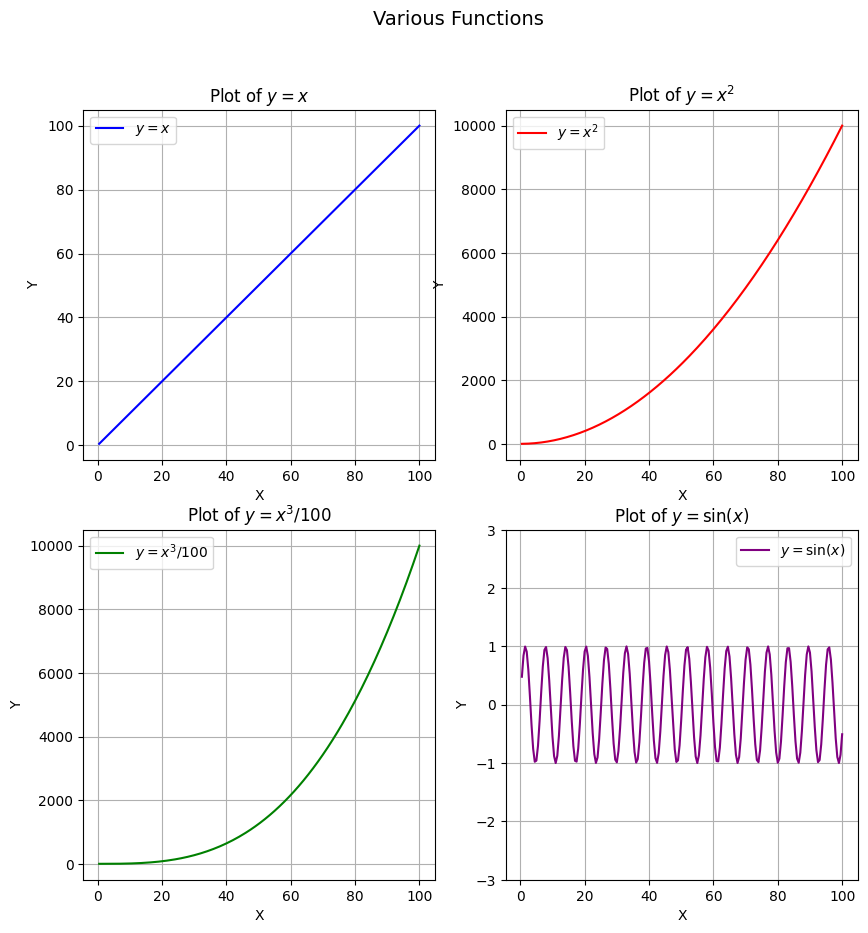

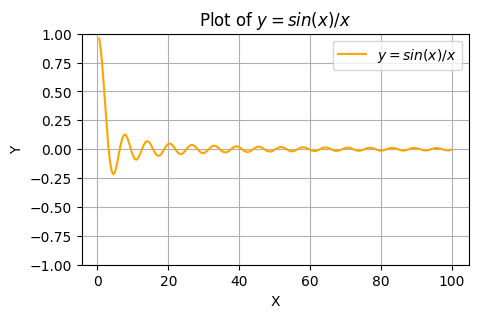

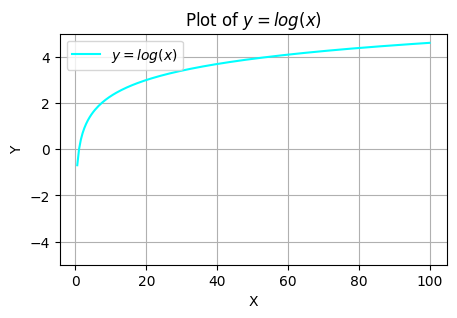

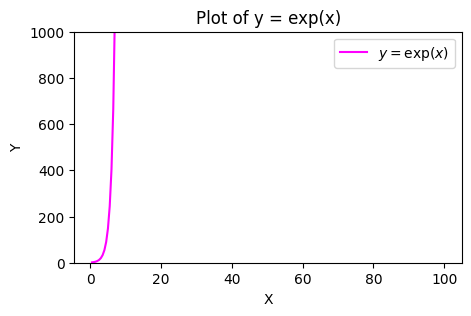

In [161]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns of subplots
fig.suptitle('Various Functions', fontsize=14)

x = np.arange(0.5, 100.5, 0.5)


y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Plotting first four functions in a separate subplot
axs[0, 0].plot(x, y1, label='$y = x$', color='blue')
axs[0, 0].set_title('Plot of $y = x$')
axs[0, 0].set_xlabel('X')
axs[0, 0].set_ylabel('Y')
axs[0, 0].legend()
axs[0, 0].grid(True)

axs[0, 1].plot(x, y2, label='$y = x^2$', color='red')
axs[0, 1].set_title('Plot of $y = x^2$')
axs[0, 1].set_xlabel('X')
axs[0, 1].set_ylabel('Y')
axs[0, 1].legend()
axs[0, 1].grid(True)

axs[1, 0].plot(x, y3, label='$y = x^3 / 100$', color='green')
axs[1, 0].set_title('Plot of $y = x^3 / 100$')
axs[1, 0].set_xlabel('X')
axs[1, 0].set_ylabel('Y')
axs[1, 0].legend()
axs[1, 0].grid(True)

axs[1, 1].plot(x, y4, label='$y = \sin(x)$', color='purple')
axs[1, 1].set_title('Plot of $y = \sin(x)$')
axs[1, 1].set_xlabel('X')
axs[1, 1].set_ylabel('Y')
axs[1, 1].legend()
axs[1, 1].grid(True)
axs[1, 1].set_ylim([-3, 3])         # Adjust y-limits for clarity


#Plot for sin(x)/x 
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # 2 rows, 2 columns of subplots
plt.figure(figsize=(5, 3))
plt.plot(x, y5, label='$y = sin(x) / x$', color='orange')
plt.title('Plot of $y = sin(x) / x$')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.ylim([-1, 1])  # Adjust y-limits for clarity

#Plot for log(x) 
plt.figure(figsize=(5, 3))
plt.plot(x, y6, label='$y = log(x)$', color='cyan')
plt.title('Plot of $y = log(x)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.ylim([-5, 5])  


plt.figure(figsize=(5, 3))
plt.plot(x, y7, label='$y = \exp(x)$', color='magenta')
plt.title('Plot of y = exp(x)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.ylim([0, 1000])  # Adjust y-limits for clarity

plt.show()


In [79]:
# fig = plt.figure()             # an empty figure with no Axes
# fig, ax = plt.subplots()       # a figure with a single Axes
# fig, axs = plt.subplots(1, 3, figsize=(10, 4))  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
# fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                            #    ['left', 'right_bottom']])

>10. ***Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.***


In [120]:
import numpy as np
import pandas as pd

np.random.seed(42) # Seed for regenerating same random numbers

A = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(A, columns=['a', 'b', 'c', 'd', 'e'])

std_dev = df.std(axis = 0)
max_std_dev_col = std_dev.idxmax()
print(f"Column with the highes std dev: {std_dev[max_std_dev_col]:0.6f} is {max_std_dev_col}")

df_mean = df.mean(axis = 1)
min_df_mean = df_mean.idxmin()
print(f"Row with lowest mean: {df_mean[min_df_mean]:0.6f} is {min_df_mean}")



Column with the highes std dev: 0.318628 is c
Row with lowest mean: 1.315381 is 11


>11. ***Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.***

In [160]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = np.where(df['f'] < 8, "LT8", "GT8")
lt8 = df[df['g'] == "LT8"]['g']
count_lt8 = lt8.size

df_numeric_col_f = df[df['g'] == "LT8"].drop(columns=['g'])['f']
std_dev_1 = df_numeric_col_f.std()
print(f"Row wise std dev of dataframe where 'lt8' if present in column 'g'",
      f"{std_dev_1:.6f}", sep='\n')

df_numeric_col_f = df[df['g'] == "GT8"].drop(columns=['g'])['f']

std_dev_2 = df_numeric_col_f.std()
print(f"Row wise std dev of dataframe where 'gt8' if present in column 'g'",
      f"{std_dev_2:.06f}", sep='\n')


Row wise std dev of dataframe where 'lt8' if present in column 'g'
0.402589
Row wise std dev of dataframe where 'gt8' if present in column 'g'
0.795615


>12. ***Write a small piece of code to explain broadcasting in numpy.***

In [200]:
#Broadcasting in python
import numpy as np

np.random.seed(42)
matrix = np.random.randint(0, 20, size=(3, 3))
print("Original matrix:", matrix, sep="\n")

a = matrix + 5
print("\nScalar Addition in matrix:" , a, sep="\n")

# column_vector = np.array([[10], [20]])   # <-- Gives error as shape(2, 1) is not similar to matrix (3, 3)
column_vector = np.array([[10], [20], [30]])  #Shape (3, 1)
result = matrix + column_vector
print(f"\nResultant Matrix + Vector Addition: \n {result}")

array_3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]]) #Shape (2, 2, 3)
array_2d = np.array([[1, 2, 3], [4, 5, 6]]) # Shape (2, 3)
product = array_2d * array_3d # Element-wise multiplication
print(f"\narray_2d :\n{array_2d}\narray_3d:\n{array_3d}\nproduct:\n{product}")

# Normalization of matrix data
mean = np.mean(matrix) # along columns
std = np.std(matrix)
normalized_matrix = matrix - mean / std
print (f"\nNormalized Matrix: \n{normalized_matrix}")

Original matrix:
[[ 6 19 14]
 [10  7  6]
 [18 10 10]]

Scalar Addition in matrix:
[[11 24 19]
 [15 12 11]
 [23 15 15]]

Resultant Matrix + Vector Addition: 
 [[16 29 24]
 [30 27 26]
 [48 40 40]]

array_2d :
[[1 2 3]
 [4 5 6]]
array_3d:
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
product:
[[[ 1  4  9]
  [16 25 36]]

 [[ 7 16 27]
  [40 55 72]]]

Normalized Matrix: 
[[ 3.5873828 16.5873828 11.5873828]
 [ 7.5873828  4.5873828  3.5873828]
 [15.5873828  7.5873828  7.5873828]]


>13. ***Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution***

In [4]:
import numpy as np

np.random.seed(42)
arr = np.random.randint(1, 100, 15)
print(arr)

def argmin(arr):
    int_max = np.iinfo(np.int32).max
    argmin = 0
    for idx, value in enumerate(arr):
        if value < arr[argmin]:
            argmin = idx
    return argmin

print("Value from argmin function: ", argmin(arr))
print("Value from np.argmin:", np.argmin(arr))

%timeit argmin(arr)
%timeit np.argmin(arr)

[52 93 15 72 61 21 83 87 75 75 88 24  3 22 53]
Value from argmin function:  12
Value from np.argmin: 12
2.37 μs ± 54.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
678 ns ± 3.06 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
